### Is there a correlation between the number of artworks an artist created and their age at the time of their death? Does an artist live longer make him/her more creative?

In [4]:
# Read in the CSV files
artists_df = pd.read_csv("artist_data.csv", low_memory=False)
artworks_df = pd.read_csv("artwork_data.csv", low_memory=False)


In [5]:
# Merge the data frames on the id column of artist_csv and artistid column of artwork_csv
merged_df = pd.merge(artists_df, artworks_df, left_on="id", right_on="artistId")

In [6]:
merged_df

,id_x,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url_x,id_y,...,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url_y
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...,102939,...,2009.0,Overall display dimensions variable,NaN,NaN,NaN,NaN,NaN,© Magdalena Abakanowicz,http://www.tate.org.uk/art/images/work/T/T12/T...,http://www.tate.org.uk/art/artworks/abakanowic...
1,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...,102938,...,2009.0,Display dimensions: 4050 x 3820 x 4000 mm,NaN,NaN,NaN,NaN,NaN,© Magdalena Abakanowicz,http://www.tate.org.uk/art/images/work/T/T12/T...,http://www.tate.org.uk/art/artworks/abakanowic...
2,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...,103642,...,2009.0,Display dimensions: 4010 x 2900 x 3700 mm,NaN,NaN,NaN,NaN,NaN,© Magdalena Abakanowicz,http://www.tate.org.uk/art/images/work/T/T12/T...,http://www.tate.org.uk/art/artworks/abakanowic...
3,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...,103644,...,2009.0,"object, each: 660 x 580 x 680 mm",NaN,NaN,NaN,NaN,NaN,© Magdalena Abakanowicz,http://www.tate.org.uk/art/images/work/T/T12/T...,http://www.tate.org.uk/art/artworks/abakanowic...
4,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...,311,...,1924.0,support: 251 x 295 mm,251,295,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/N/N03/N...,http://www.tate.org.uk/art/artworks/abbey-illu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69190,12542,"Zorio, Gilberto",Male,born 1944,1944.0,NaN,"Andorno Micca, Italia",NaN,http://www.tate.org.uk/art/artists/gilberto-zo...,103399,...,2009.0,object: 125 x 1113 x 190 mm image: 340 x 287 m...,125,1113,190.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/zorio-hatr...
69191,2186,"Zox, Larry",Male,born 1936,1936.0,NaN,"Des Moines, United States",NaN,http://www.tate.org.uk/art/artists/larry-zox-2186,16531,...,1968.0,support: 2235 x 2489 mm,2235,2489,NaN,mm,date inscribed,"© Larry Zox, courtesy Stephen Haller Gallery, ...",http://www.tate.org.uk/art/images/work/T/T01/T...,http://www.tate.org.uk/art/artworks/zox-orange...
69192,621,"Zuccarelli, Francesco",Male,1702–1788,1702.0,1788.0,Italia,Firenze,http://www.tate.org.uk/art/artists/francesco-z...,16532,...,1985.0,support: 1264 x 1572 mm frame: 1497 x 1800 mm,1264,1572,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/T/T04/T...,http://www.tate.org.uk/art/artworks/zuccarelli...
69193,2187,"Zuloaga, Ignacio",Male,1870–1945,1870.0,1945.0,España,España,http://www.tate.org.uk/art/artists/ignacio-zul...,16533,...,1923.0,support: 292 x 406 mm frame: 470 x 585 x 93 mm,292,406,NaN,mm,NaN,"© DACS, 2014",http://www.tate.org.uk/art/images/work/N/N01/N...,http://www.tate.org.uk/art/artworks/zuloaga-vi...


In [12]:
# Convert the yearOfDeath column to numeric
merged_df["yearOfDeath"] = pd.to_numeric(merged_df["yearOfDeath"], errors="coerce")
#  There are some values missing so use coerce to assign NaN (Not a Number) to that value instead of throwing an erro

# Calculate the age at the time of death
merged_df["ageAtDeath"] = merged_df["yearOfDeath"] - merged_df["yearOfBirth"]
merged_df["ageAtDeath"]

0         NaN
1         NaN
2         NaN
3         NaN
4        59.0
         ... 
69190     NaN
69191     NaN
69192    86.0
69193    75.0
69194    90.0
Name: ageAtDeath, Length: 69195, dtype: float64

In [15]:
merged_df.columns

Index(['id_x', 'name', 'gender', 'dates', 'yearOfBirth', 'yearOfDeath',
       'placeOfBirth', 'placeOfDeath', 'url_x', 'id_y', 'accession_number',
       'artist', 'artistRole', 'artistId', 'title', 'dateText', 'medium',
       'creditLine', 'year', 'acquisitionYear', 'dimensions', 'width',
       'height', 'depth', 'units', 'inscription', 'thumbnailCopyright',
       'thumbnailUrl', 'url_y', 'ageAtDeath'],
      dtype='object')

In [16]:
# Calculate the total number of artworks for each artist
artist_counts = merged_df["name"].value_counts()
artist_counts

Turner, Joseph Mallord William    39389
Jones, George                      1046
Moore, Henry, OM, CH                623
Daniell, William                    612
Beuys, Joseph                       578
                                  ...  
Janas, Piotr                          1
Jamieson, Alexander                   1
James, A. Gosset                      1
Jagger, Charles Sargeant              1
Zyw, Aleksander                       1
Name: name, Length: 3332, dtype: int64

In [26]:
# Create a data frame with artist name, number of artworks, and age at death
artist_info = pd.DataFrame({ "name": artist_counts.index, "numArtworks": artist_counts.values, "ageAtDeath": merged_df.groupby("name")["ageAtDeath"].mean().values})

In [27]:
artist_info

,name,numArtworks,ageAtDeath
0,"Turner, Joseph Mallord William",39389,NaN
1,"Jones, George",1046,59.0
2,"Moore, Henry, OM, CH",623,93.0
3,"Daniell, William",612,43.0
4,"Beuys, Joseph",578,NaN
...,...,...,...
3327,"Janas, Piotr",1,75.0
3328,"Jamieson, Alexander",1,90.0
3329,"James, A. Gosset",1,NaN
3330,"Jagger, Charles Sargeant",1,NaN


In [28]:
# Calculate the correlation between number of artworks and age at death
corr = artist_info["ageAtDeath"].corr(artist_info["numArtworks"])
corr

-0.006352679799021724

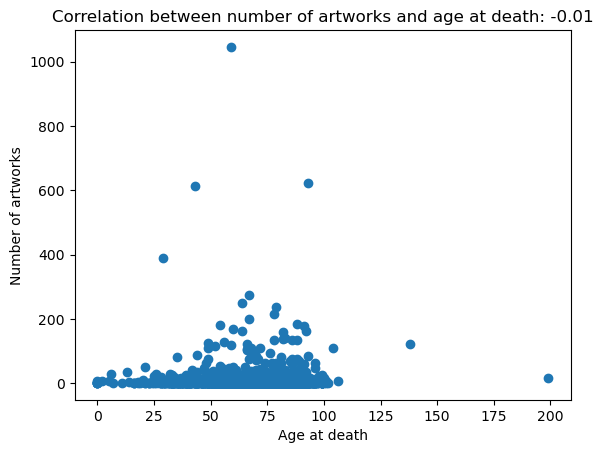

In [23]:
# Visualize the data with a scatter plot
plt.scatter(artist_info["ageAtDeath"], artist_info["numArtworks"])
plt.xlabel("Age at death")
plt.ylabel("Number of artworks")

plt.title(f"Correlation between number of artworks and age at death: {corr:.2f}")
plt.show()
# As we can see, the correlation of the two variables is weak(<0.01)
# we can not approve the longer an artist live, the more artworks he/she makes)
